(84548, 21)
(84548, 12)
   BOROUGH   NEIGHBORHOOD                ADDRESS  ZIP CODE  RESIDENTIAL UNITS  \
4        1  ALPHABET CITY           153 AVENUE B     10009                  5   
5        1  ALPHABET CITY  234 EAST 4TH   STREET     10009                 28   
6        1  ALPHABET CITY  197 EAST 3RD   STREET     10009                 16   

   COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  \
4                 0            5             1633              6440   
5                 3           31             4616             18690   
6                 1           17             2212              7803   

   YEAR BUILT SALE PRICE            SALE DATE  
4        1900    6625000  2017-07-19 00:00:00  
5        1900        -    2016-12-14 00:00:00  
6        1900        -    2016-12-09 00:00:00  
BOROUGH              0
NEIGHBORHOOD         0
ADDRESS              0
ZIP CODE             0
RESIDENTIAL UNITS    0
COMMERCIAL UNITS     0
TOTAL UNITS          0
LAND SQUARE F

<ipython-input-8-27a9a4eff724>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_new['SALE PRICE'].replace('-', float('nan'), inplace=True)
<ipython-input-8-27a9a4eff724>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_new['SALE PRICE'].replace(0, float('nan'), inplace=True)
<ipython-input-8-27a9a4eff724>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_new['TOTAL UNITS'].replace(0, float('nan'), inp

   BOROUGH   NEIGHBORHOOD                ADDRESS  ZIP CODE  RESIDENTIAL UNITS  \
4        1  ALPHABET CITY           153 AVENUE B     10009                  5   
5        1  ALPHABET CITY  234 EAST 4TH   STREET     10009                 28   
6        1  ALPHABET CITY  197 EAST 3RD   STREET     10009                 16   

   COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
4                 0          5.0            1633.0             6440.0   
5                 3         31.0            4616.0            18690.0   
6                 1         17.0            2212.0             7803.0   

   YEAR BUILT  SALE PRICE            SALE DATE  
4        1900   6625000.0  2017-07-19 00:00:00  
5        1900         NaN  2016-12-14 00:00:00  
6        1900         NaN  2016-12-09 00:00:00  
10.0        672
450000.0    398
550000.0    384
650000.0    383
600000.0    382
           ... 
236775.0      1
465548.0      1
241984.0      1
263639.0      1
69300.0       1
Name: SALE

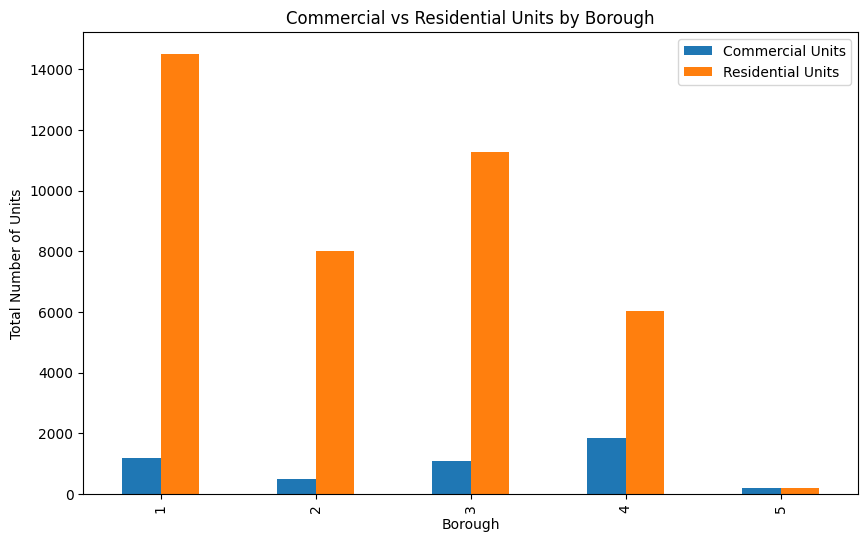

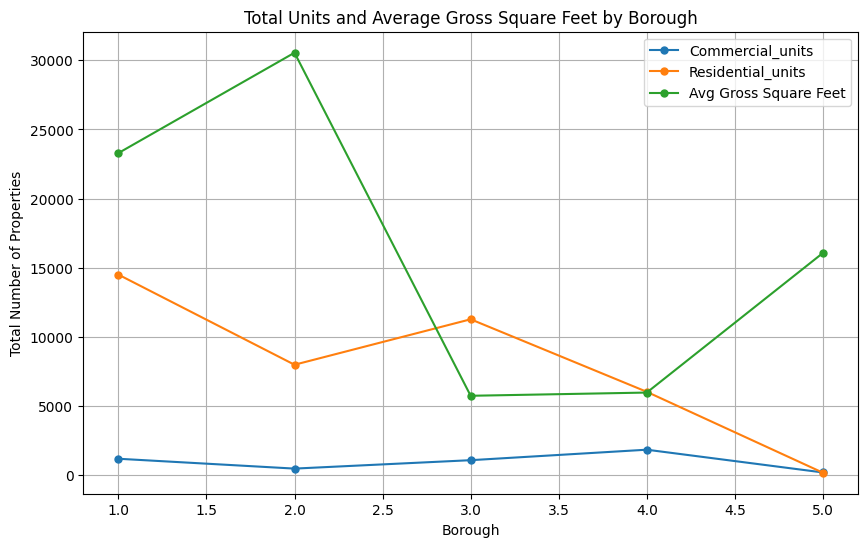

In [8]:
import pandas as pd #importing pandas library
import matplotlib.pyplot as plt #importing from matplotlib library


data_frame=pd.read_csv(r'/content/nyc-rolling-sales.csv', index_col=0) #This line loads a CSV file from the specified path and uses the data in the first column as the row index for the dataframe in variable data_frame

print(data_frame.shape) #it prints num of rows and columns of data_frame
#print(data_frame.head) #it prints head of the data_frame
#print(data_frame.columns) #it will only print column names of data_frame


#Cleaning the Data process
data_frame_new = data_frame.drop(columns=['TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT','BUILDING CLASS CATEGORY','BUILDING CLASS AT PRESENT', 'APARTMENT NUMBER',
'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']) #it will drop specified columns from the data set and stores the new data into new data_frame i.e. data_frame_new
#print(data_frame_new.columns) #it will only print new column names of data_frame_new
data_frame_new.drop_duplicates() #to drop duplicate rows from the data_frame
print(data_frame_new.shape) #it prints num of rows and columns of data_frame

#To check how many unique values are there for borough
print (data_frame_new.head(3))
print(data_frame_new.isnull().sum())
unique_values = data_frame_new['BOROUGH'].unique()
print(unique_values.size)

#to check how many unique values are there for SALE PRICE
print(data_frame_new['SALE PRICE'].unique())
unique_sale_value = data_frame_new['SALE PRICE'].unique()
print(unique_sale_value)
print(data_frame_new.head(3)) #it will display 1st 3 rows of data_frame
value_count = data_frame_new['SALE PRICE'].value_counts() #prints the value counts of the sale price column.
print(value_count) #will print the output

#it will convert the column sale price to numeric value
data_frame_new['SALE PRICE'] = pd.to_numeric(data_frame_new['SALE PRICE'], errors='coerce')
data_frame_new['YEAR BUILT'] = pd.to_numeric(data_frame_new['YEAR BUILT'], errors='coerce')
data_frame_new['TOTAL UNITS'] = pd.to_numeric(data_frame_new['TOTAL UNITS'], errors='coerce')
data_frame_new['LAND SQUARE FEET'] = pd.to_numeric(data_frame_new['LAND SQUARE FEET'], errors='coerce')
data_frame_new['GROSS SQUARE FEET'] = pd.to_numeric(data_frame_new['GROSS SQUARE FEET'], errors='coerce')
print(data_frame_new['SALE PRICE'].dtype)    #prints the datatype of the column
value_count_year_built = data_frame_new['YEAR BUILT'].value_counts() #it will convert some columns to numeric type with error handling
print(value_count_year_built)
data_frame_new = data_frame_new[data_frame_new['YEAR BUILT'] >= 1900] #for column year built it will filter the count greater than year 1900
value_count_year_built = data_frame_new['YEAR BUILT'].value_counts()
print(value_count_year_built) #it will count and prints the updated year built value

#it will replace - and 0 values in all mentioned columns with nan
data_frame_new['SALE PRICE'].replace('-', float('nan'), inplace=True)
data_frame_new['SALE PRICE'].replace(0, float('nan'), inplace=True)
data_frame_new['TOTAL UNITS'].replace(0, float('nan'), inplace=True)
data_frame_new['LAND SQUARE FEET'].replace('-', float('nan'), inplace=True)
data_frame_new['GROSS SQUARE FEET'].replace('-', float('nan'), inplace=True)
data_frame_new['LAND SQUARE FEET'].replace(0, float('nan'), inplace=True)
data_frame_new['GROSS SQUARE FEET'].replace(0, float('nan'), inplace=True)
print(data_frame_new.head(3))
value_count_update = data_frame_new['SALE PRICE'].value_counts()
print(value_count_update)
data_frame_new.dropna(inplace=True)  # to drop NA values
print(data_frame_new.shape)
print(data_frame_new.head(3))
print(data_frame_new['YEAR BUILT'].head)


#reducing anomalies in sale price
data_frame_new = data_frame_new[data_frame_new['SALE PRICE'] >= 1000000]
data_frame_new = data_frame_new[data_frame_new['SALE PRICE'] <= 100000000]
print(data_frame_new.shape)

#sorting the year built column using min max function
data_frame_new = data_frame_new.sort_values(by='YEAR BUILT')
min_year = data_frame_new['YEAR BUILT'].min()
max_year = data_frame_new['YEAR BUILT'].max()

#cleaned data is inserted in this data_frame_new now
data_frame_new.to_excel(r"/content/data_frame_new.xlsx", index=False)



#using group by function for borough column. Udsing sum and mean function to calculate average and sum for gross square feet area and total units for each borough
borough_units = data_frame_new.groupby('BOROUGH')['TOTAL UNITS'].sum()
borough_feet = data_frame_new.groupby('BOROUGH')['GROSS SQUARE FEET'].mean()
borough_commercial = data_frame_new.groupby('BOROUGH')['COMMERCIAL UNITS'].sum()
borough_Residential= data_frame_new.groupby('BOROUGH')['RESIDENTIAL UNITS'].sum()


#Create a bar plot

df_units = pd.DataFrame({'Commercial Units': borough_commercial, 'Residential Units': borough_Residential})
# Create a bar plot
df_units.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Borough')
plt.ylabel('Total Number of Units')
plt.title('Commercial vs Residential Units by Borough')
plt.show()

#Create a line graph to visualize the relationship
#it calculates the sum of commercial units and residential units for each borough
borough_units_new = data_frame_new.groupby('BOROUGH')['COMMERCIAL UNITS'].sum()
borough_units_new1 = data_frame_new.groupby('BOROUGH')['RESIDENTIAL UNITS'].sum()
plt.figure(figsize=(10, 6)) #setting the figure size to 10by 6 inch

#this creates a line plot where the x-axis represents the boroughs and the y-axis represents the total number of commercial units for each borough and each data point is marked with circles.
plt.plot(borough_units_new.index, borough_units_new.values, marker='o', markersize=5, label='Commercial_units')
plt.plot(borough_units_new1.index, borough_units_new1.values, marker='o', markersize=5, label='Residential_units')
plt.plot(borough_feet.index, borough_feet.values, marker='o', markersize=5, label='Avg Gross Square Feet')
#giving the title for the line chart
plt.title('Total Units and Average Gross Square Feet by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Number of Properties')
plt.legend()
plt.grid(True)
plt.show()









# New Section